In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
    # Davis,
    # Downing,
    # Feld,
    Grofman,
    # Grudger,
    # Joss,
    # Nydegger,
    # Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    # Tullock,
    # Pavlov
])

In [3]:

class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        self.flatten = nn.Flatten()
        self.gru = nn.GRU(2, 2, 1, batch_first=True)
        self.layer4 = nn.Linear(2 * lookback, 2)

        nn.init.kaiming_uniform_(self.layer4.weight, mode="fan_in", nonlinearity="relu")

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x, hn = self.gru(x)
        x = self.flatten(x)
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    def __init__(self):
        super().__init__()

        self.lookback = 4
        self.epsilon = 0.2

        self._learning_rate = 0.05
        self._discount_rate = 0.95
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    limit=100,
    epochs=20,
)

[20:25:41] Commencement of training.
[20:25:44] Completed epoch 1: 1.0891709971740493
[20:25:46] Completed epoch 2: 1.0880020363207732
[20:25:48] Completed epoch 3: 1.5173346908805154
[20:25:50] Completed epoch 4: 1.6197510181603867
[20:25:52] Completed epoch 5: 1.7780008145283093
[20:25:54] Completed epoch 6: 1.8723340121069243
[20:25:56] Completed epoch 7: 1.9462862960916494
[20:25:58] Completed epoch 8: 1.9886255090801932
[20:26:00] Completed epoch 9: 2.027444896960172
[20:26:02] Completed epoch 10: 2.0652004072641548
[20:26:04] Completed epoch 11: 2.0920003702401404
[20:26:06] Completed epoch 12: 2.111833672720129
[20:26:08] Completed epoch 13: 2.129231082510888
[20:26:10] Completed epoch 14: 2.1426431480458246
[20:26:12] Completed epoch 15: 2.155466938176103
[20:26:15] Completed epoch 16: 2.1707502545400965
[20:26:18] Completed epoch 17: 2.1766472983906793
[20:26:21] Completed epoch 18: 2.1885557818134194
[20:26:23] Completed epoch 19: 2.196579161717976
[20:26:26] Completed epoch 

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (gru): GRU(2, 2, batch_first=True)
  (layer4): Linear(in_features=8, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 8271, <Action.DEFECT: 1>: 1729}
{<Action.COOPERATE: 0>: 0.8271, <Action.DEFECT: 1>: 0.1729}


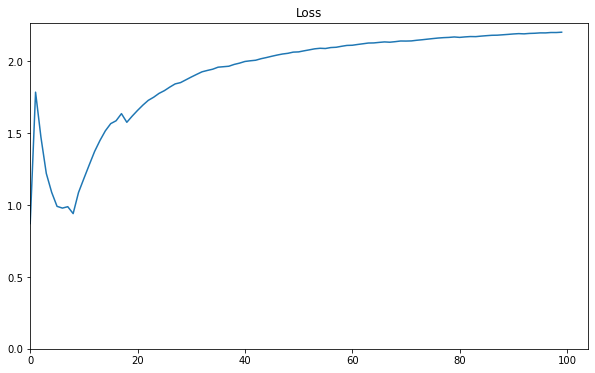

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

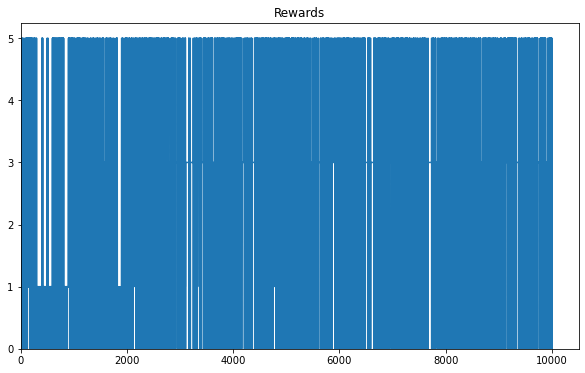

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

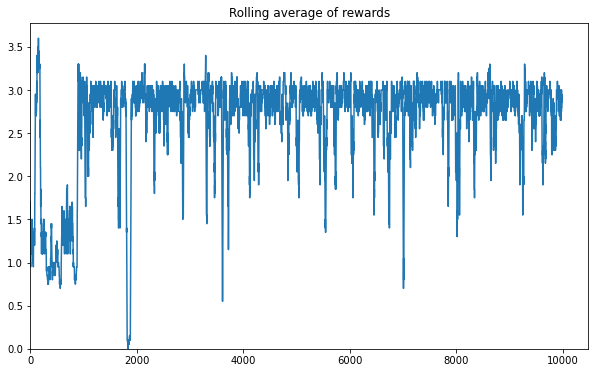

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

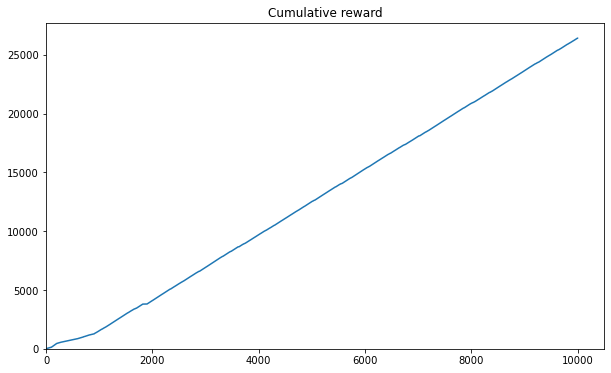

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

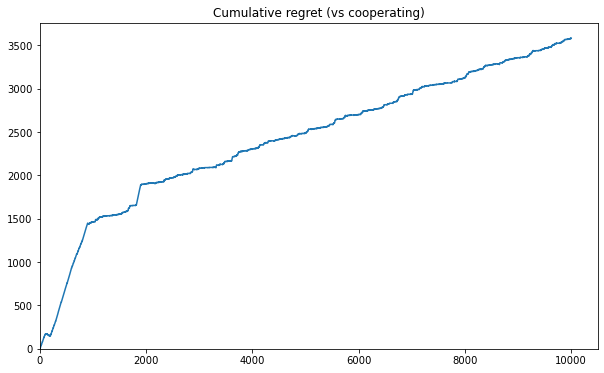

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.106, <Action.DEFECT: 1>: 0.894}, {<Action.COOPERATE: 0>: 0.238, <Action.DEFECT: 1>: 0.762}, {<Action.COOPERATE: 0>: 0.914, <Action.DEFECT: 1>: 0.086}, {<Action.COOPERATE: 0>: 0.904, <Action.DEFECT: 1>: 0.096}, {<Action.COOPERATE: 0>: 0.894, <Action.DEFECT: 1>: 0.106}, {<Action.COOPERATE: 0>: 0.894, <Action.DEFECT: 1>: 0.106}, {<Action.COOPERATE: 0>: 0.92, <Action.DEFECT: 1>: 0.08}, {<Action.COOPERATE: 0>: 0.896, <Action.DEFECT: 1>: 0.104}, {<Action.COOPERATE: 0>: 0.9, <Action.DEFECT: 1>: 0.1}, {<Action.COOPERATE: 0>: 0.906, <Action.DEFECT: 1>: 0.094}, {<Action.COOPERATE: 0>: 0.896, <Action.DEFECT: 1>: 0.104}, {<Action.COOPERATE: 0>: 0.912, <Action.DEFECT: 1>: 0.088}, {<Action.COOPERATE: 0>: 0.884, <Action.DEFECT: 1>: 0.116}, {<Action.COOPERATE: 0>: 0.898, <Action.DEFECT: 1>: 0.102}, {<Action.COOPERATE: 0>: 0.89, <Action.DEFECT: 1>: 0.11}, {<Action.COOPERATE: 0>: 0.924, <Action.DEFECT: 1>: 0.076}, {<Action.COOPERATE: 0>: 0.878, <Action.DEFECT: 1>: 0.122}, {<Ac

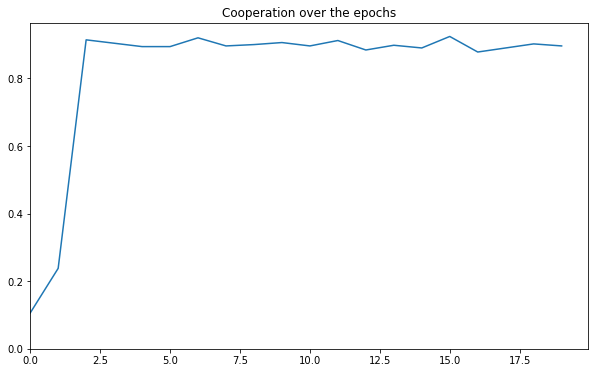

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [12]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (gru): GRU(2, 2, batch_first=True)
  (layer4): Linear(in_features=8, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [03:29<00:00,  4.60matches/s] 

OmegaTFT                       800                  13.410978999999998  
Shubik                         792                  11.996149           
TidemanAndChieruzzi            792                  13.889929000000002  
TidemanAndChieruzzi2    791                  13.953209           
GraaskampAndKatzen        790                  14.325173000000001  
GenerousTFT                    786                  12.592996999999999  
Leyvraz                        782                  49.45136299999999   
SteinAndRapoport               769                  29.785145           
Pavlov                         769                  10.613999999999999  
TFTT                           769                  13.162939000000001  
Grofman                        766                  11.960014000000001  
TTFT                           766                  13.880649           
White              765                  13.484024000000002  
Weiner                 764                  27.594204           
Davis     